# Naive Bayes Classification assuming a Gaussian Distribution

## Let's first read and study the data set: We have 10 features in our data set :
## Satisfaction level
## Last evaluation
## Number of Projects
## Average monthly hours
## Time Spent
## Work Accident
## Left
## Promotion
## Salary

## We use the independent feature Model:
## p(Ck|x1,…,xn)=1/p(x ) * p(Ck)* ∏p(xi∣Ck)

 


In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split # We need to demarcate the Training and Testing set
import matplotlib.mlab as mlab
import math # for sqrt
import scipy.stats # normal distribution
from sklearn.preprocessing import normalize
import seaborn as sn # Data visualization
import pandas as pd

with open('C:/Users/Harshini S/Desktop/HR_comma_sep.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        print(row)
        
        


        



['satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary']
['0.38,0.53,2,157,3,0,1,0,sales,low']
['0.8,0.86,5,262,6,0,1,0,sales,medium']
['0.11,0.88,7,272,4,0,1,0,sales,medium']
['0.72,0.87,5,223,5,0,1,0,sales,low']
['0.37,0.52,2,159,3,0,1,0,sales,low']
['0.41,0.5,2,153,3,0,1,0,sales,low']
['0.1,0.77,6,247,4,0,1,0,sales,low']
['0.92,0.85,5,259,5,0,1,0,sales,low']
['0.89,1,5,224,5,0,1,0,sales,low']
['0.42,0.53,2,142,3,0,1,0,sales,low']
['0.45,0.54,2,135,3,0,1,0,sales,low']
['0.11,0.81,6,305,4,0,1,0,sales,low']
['0.84,0.92,4,234,5,0,1,0,sales,low']
['0.41,0.55,2,148,3,0,1,0,sales,low']
['0.36,0.56,2,137,3,0,1,0,sales,low']
['0.38,0.54,2,143,3,0,1,0,sales,low']
['0.45,0.47,2,160,3,0,1,0,sales,low']
['0.78,0.99,4,255,6,0,1,0,sales,low']
['0.45,0.51,2,160,3,1,1,1,sales,low']
['0.76,0.89,5,262,5,0,1,0,sales,low']
['0.11,0.83,6,282,4,0,1,0,sales,low']
['0.38,0.55,2,147,3,0,1,0,sales,low']
['0.09,0.95,6,30

# Event Model
## We need to make some assumptions on how the features are distibuted. What are the values of the features for a given class likely to be?

## As we are dealing with continous data let's assume the data is normally distributed. 

## There are Multinomial Naive Bayes (bag of words), Bernoulli Naive Bayes which are popular when we have features taking on discrete values, used in document classification.

## I will be using Gaussian Naive Bayes classifier.

## So the probability density function will be,

## f(x=x0∣Ci)=1/sqrt(2piσ*σ)*e^−(x0−μc)^2 /2σ*σ*c

## So in the orginal bayes equation,

## p(Ck | x)=p(Ck)*p(x∣Ck)/p(x)=p(x,Ck)p(x)
## p(Ck | x)=p(Ck) *p(x∣Ck)/p(x)=p(x,Ck)p(x)
## So this is,

## posterior=prior×likelihood evidence

## Estimating likelyhood in this section :

## Likelyhood probability density function


## Due to the assumption that each feature is conditionally independent of each other given the class, so the joint probability model will be,

## p(x,Ck)=p(Ck)∏i=1np(xi∣Ck)
## p(x,Ck)=p(Ck)∏i=1np(xi∣Ck)
Which means,

## p(x∣Ck)=∏i=1np(xi∣Ck)
## p(x∣Ck)=∏i=1np(xi∣Ck)
## p(x∣Ck)∝∏i=1nf(xi∣Ck)
## p(x∣Ck)∝∏i=1nf(xi∣Ck)
### The actual probability should be something like

### p(x=x0 | Ci)=∫x0+ϵx0−ϵf(x | μi,σ2i)dx

### Where the probability density of the normal (gaussian) distribution is,

### f(x |μ,σ2)=1/ sqrt (σ*σ2π)* e^(x−μ)^2/2σ*σ

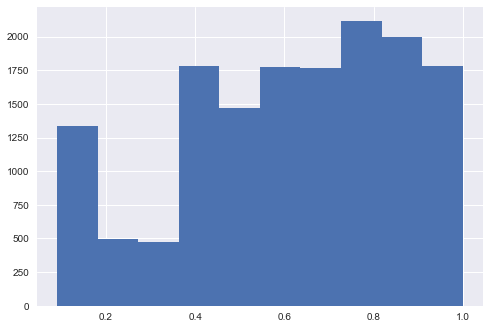

mean
var


0.061817200647087255

In [10]:
import matplotlib.pyplot as plt
import csv 
import pandas as pd    
df = pd.read_csv('C:/Users/Harshini S/Desktop/HR_comma_sep.csv',sep=',')
plt.hist(df['satisfaction_level'],bins=10)
plt.show()
print("mean")
df["satisfaction_level"].mean()

print("var")
df["satisfaction_level"].var()





    






# Here I'm plotting histogram of those features that indicate " GOOD EMPLOYEES"

## The Kaggle Dataset, specifies that Good employees have following features :

   ## Time spent in the company >=4
  
   ## Last Evaluation >= Mean
   
   ## Number of projects >=5
   
   ## Plotted in the above order and mean and Var for this set is found too

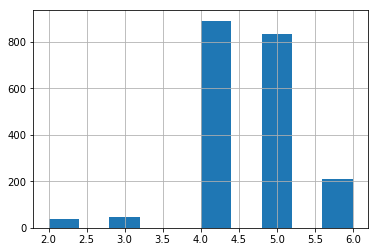

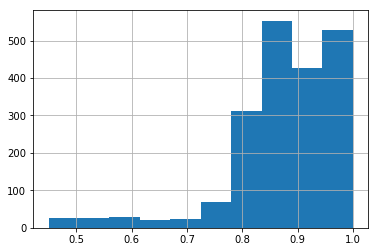

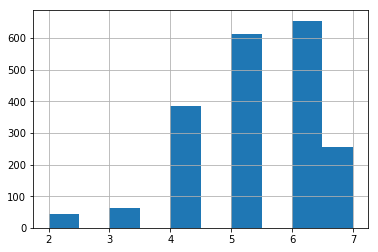

Count
satisfaction_level       2016
last_evaluation          2016
number_project           2016
average_montly_hours     2016
time_spend_company       2016
Work_accident            2016
left                     2016
promotion_last_5years    2016
sales                    2016
salary                   2016
dtype: int64
MEAN
satisfaction_level         0.462788
last_evaluation            0.876503
number_project             5.257937
average_montly_hours     254.820437
time_spend_company         4.560020
Work_accident              0.047619
left                       1.000000
promotion_last_5years      0.001984
dtype: float64
VARIANCE
satisfaction_level          0.120414
last_evaluation             0.010350
number_project              1.285297
average_montly_hours     1185.726550
time_spend_company          0.612773
Work_accident               0.045374
left                        0.000000
promotion_last_5years       0.001981
dtype: float64


In [16]:
import matplotlib.pyplot as plt
import csv 
import pandas as pd    
df = pd.read_csv('C:/Users/Harshini S/Desktop/HR_comma_sep.csv',sep=',')
df[((df.left==1)&(df.last_evaluation>=0.7141))|((df.time_spend_company>=4)&(df.left==1))|((df.number_project>=5)&(df.left==1))].time_spend_company.hist(bins=10)
plt.show()

df[((df.left==1)&(df.last_evaluation>=0.7141))|((df.time_spend_company>=4)&(df.left==1))|((df.number_project>=5)&(df.left==1))].last_evaluation.hist(bins=10)
plt.show()
df[((df.left==1)&(df.last_evaluation>=0.7141))|((df.time_spend_company>=4)&(df.left==1))|((df.number_project>=5)&(df.left==1))].number_project.hist(bins=10)
plt.show()
ct=df[((df.last_evaluation>=0.7141)&(df.left==1)) |((df.time_spend_company>=4)&(df.left==1))|((df.number_project>=5)&(df.left==1))].count()
print("Count")
print(ct)

m=df[((df.last_evaluation>=0.7141)&(df.left==1)) |((df.time_spend_company>=4)&(df.left==1))|((df.number_project>=5)&(df.left==1))].mean()
print("MEAN")
print(m)
v=df[((df.last_evaluation>=0.7141)&(df.left==1)) |((df.time_spend_company>=4)&(df.left==1))|((df.number_project>=5)&(df.left==1))].var()
print("VARIANCE")
print(v)

#Mean, Variance and Count of the GOOD employees who LEFT





# Splitting Good employees who have left into TRAINING and TEST sets in 80:20
## Printing test and training heads

In [9]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split # We need to demarcate the Training and Testing setdf = pd.read_csv('C:/Users/Harshini S/Desktop/HR_comma_sep.csv',sep=',')
train, test = train_test_split(df[((df.left==1)&(df.last_evaluation>=0.7141))|((df.time_spend_company>=4)&(df.left==1))|((df.number_project>=5)&(df.left==1))], test_size = 0.2)
print("TEST HEAD")
print(test.head())
print("TRAIN HEAD")
print(train.head())
classCounts = train['left'].value_counts()
totalCount = classCounts
print("Training samples count")
print(totalCount)







TEST HEAD
       satisfaction_level  last_evaluation  number_project  \
14265                0.10             0.92               7   
14812                0.84             0.94               5   
12492                0.11             0.83               6   
369                  0.10             0.82               6   
160                  0.10             0.95               7   

       average_montly_hours  time_spend_company  Work_accident  left  \
14265                   307                   4              0     1   
14812                   222                   6              0     1   
12492                   244                   4              0     1   
369                     266                   4              0     1   
160                     301                   4              0     1   

       promotion_last_5years        sales  salary  
14265                      0      support     low  
14812                      0  product_mng     low  
12492                      0

# Likelyhood pdf vs LastEvaluation

E:\SOFTWARE\anaconda\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


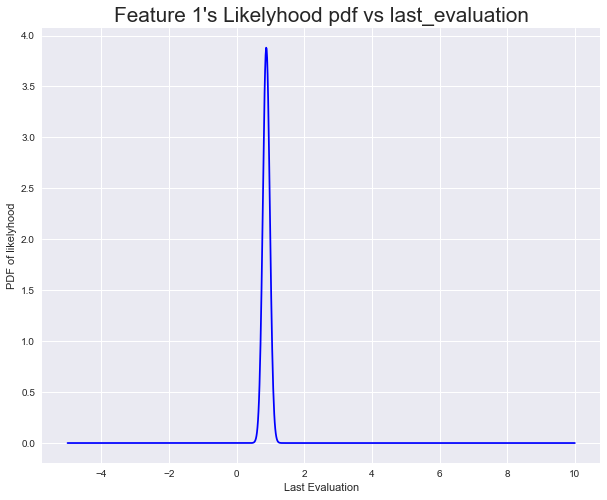

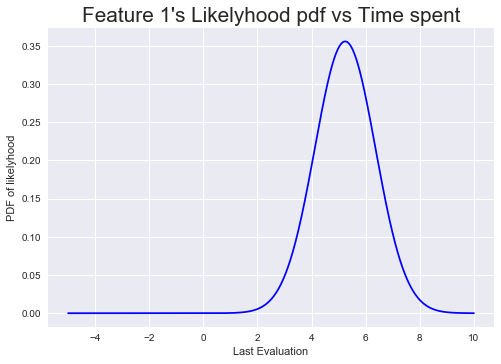

In [13]:
# I'll now plot the gaussian curves, 
# we can see the probability distribution of each feature given a particular class.
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split # We need to demarcate the Training and Testing set
import matplotlib.mlab as mlab
import math # for sqrt
import scipy.stats # normal distribution
from sklearn.preprocessing import normalize
import seaborn as sn # Data visualization
import pandas as pd

# Length in cm
x = np.linspace(-5, 10, 1000)

fig = plt.figure()
fig.set_size_inches(10, 8)

plt.title('Feature 1\'s Likelyhood pdf vs last_evaluation', size='xx-large')
plt.xlabel('Last Evaluation')
plt.ylabel('PDF of likelyhood')

# Note variance is the square of the standard deviation, here sd is the required input
plt.plot(x,mlab.normpdf(x, means[1], math.sqrt(variances[1]) ), c = 'b', label = '')


plt.legend(loc=1) # 2 => leftTop ; 1 => rightTop

plt.show() 

plt.title('Feature 2\'s Likelyhood pdf vs Time spent', size='xx-large')
plt.xlabel('Last Evaluation')
plt.ylabel('PDF of likelyhood')


plt.plot(x,mlab.normpdf(x, means[2], math.sqrt(variances[2]) ), c = 'b', label = '')


plt.legend(loc=1) # 2 => leftTop ; 1 => rightTop

plt.show() 





In [23]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split # We need to demarcate the Training and Testing set
import matplotlib.mlab as mlab
import math # for sqrt
import scipy.stats # normal distribution
from sklearn.preprocessing import normalize
import seaborn as sn # Data visualization
import pandas as pd
# return f(x_i | C_k) 
# i.e. the probability density of getting "x" in feature i's prob distribution given class k
dfClasses = {}
means = {}
variances = {}
ct=0
df = pd.read_csv('C:/Users/Harshini S/Desktop/HR_comma_sep.csv',sep=',')
# Seperate training set w.r.t class labels
dfClasses["Left1"] = df.loc[((df.left==1)&(df.last_evaluation>=0.7141))|((df.time_spend_company>=4)&(df.left==1))|((df.number_project>=5)&(df.left==1))]
    
# find mu_i and var_i which are parameters for the Gaussian Event Model

variances = dfClasses["Left1"].var()
means = dfClasses["Left1"].mean()                                                                                                                                           
                                                                                                                                           

def pdfFeatureGivenClass(x,k):
    ourCalc = (1/math.sqrt(2*(math.pi)* variances[k]))*math.exp( (-(x-means[k])**2) / (2*variances[k]))
    scipyCalc = scipy.stats.norm( means[k], math.sqrt(variances[k]) ).pdf(x)
    
    # You might see around 10^(-16)
    #print("error in our calculation : "+str(scipyCalc-ourCalc))
    return(scipyCalc)

print(pdfFeatureGivenClass(0.63,1)) # Try different values




# Given a string - class name, return class no
def labelofClass(x):
    return {
        'Left': 1,
        
    }.get(x, -1)    # -1 is default if x not found

labelofClass('Left') # Just testing it
                                                                                                                                           








0.208277671763


1

## Value proportional to Posterior Probability is calculated, normalised, thereby printing class predicted.
   ### Now lets try to compute the pdf for the training set, then move on to the testing set

   ### So we will get 2 normalised values that are proportional to Posterior Probability

   ### p(Ck |x) ∝ p(Ck)∏i=1nf(xi∣Ck)
   ### Here, we do not need to use Class priori  because, the value is same for each case, and we are interested only in proportionate values.

   ### We can calculate p(Ck |x)by normalizing these 2 values, because each sample      has to be in one of these 2 classes.




In [12]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split # We need to demarcate the Training and Testing set
import matplotlib.mlab as mlab
import math # for sqrt
import scipy.stats # normal distribution
from sklearn.preprocessing import normalize
import seaborn as sn # Data visualization
import pandas as pd
# return f(x_i | C_k) 
# i.e. the probability density of getting "x" in feature i's prob distribution given class k
df = pd.read_csv('C:/Users/Harshini S/Desktop/HR_comma_sep.csv',sep=',')
df = df.sample(frac=1).reset_index(drop=True)
dfClasses = {}
dfC={}
means = {}
variances = {}

ct=0
ct2=0
train, test = train_test_split(df[((df.left==1)&(df.last_evaluation>=0.7141))|((df.time_spend_company>=4)&(df.left==1))|((df.number_project>=5)&(df.left==1))], test_size = 0.2)

predictedProb = {}
def labelofClass(x):
    return {
        'Left': 1,
        
    }.get(x, -1)    # -1 is default if x not found

dfClasses["Left1"] =train
variances = dfClasses["Left1"].var()
means = dfClasses["Left1"].mean()         
print("VARTRAIN")
print(variances)

dfClasses["Left0"] = df.loc[(df.left==0)&((df.left==1)&(df.last_evaluation<0.7141))|((df.time_spend_company<4)&(df.left==1))|((df.number_project<5)&(df.left==1))]
va=dfClasses["Left0"].var()
me=dfClasses["Left0"].mean()
                             
                             
def pdfFeatureGivenClass(x,k):
    ourCalc = (1/math.sqrt(2*(math.pi)* variances[k]))*math.exp( (-(x-means[k])**2) / (2*variances[k]))
    scipyCalc = scipy.stats.norm( means[k], math.sqrt(variances[k]) ).pdf(x)
    
    # You might see around 10^(-16)
    #print("error in our calculation : "+str(scipyCalc-ourCalc))
    return(scipyCalc)

# Posterior prob for Training set samples
for index, row in train.iterrows():
    print("\n\nFor the sample in the "+str(index)+"th row the 4 features take the \nfollowing values in cm,\n")
    print("\nLast evaluation : "+str(row[1])+
          "\nNumber Project: " +str(row[2])+
          "\nTime Spent in the company : "+str(row[4]))
         
   
  
    
    actualClass = labelofClass(row[6])
    print("\nNote this sample is drawn from class no : "+str(actualClass))
    
    # p(C_k | \vec x) = predictedProb[indexOfX][k]
    preNormalized = {}
    
    # Iterate over 3 classes and 4 features
    
    likelyhood = 1
      
    likelyhood = likelyhood * pdfFeatureGivenClass(row[1],1)*pdfFeatureGivenClass(row[2],2)*pdfFeatureGivenClass(row[4],4)
    print("\n \t the likelyhood is propotional to "+str(likelyhood))
   

    print("\n")
    preNormalized[1]=scipy.stats.norm(means[1], variances[1]**(1/2.0)).pdf(row[1])*scipy.stats.norm(means[2], variances[2]**(1/2.0)).pdf(row[2])*scipy.stats.norm(means[4], variances[4]**(1/2.0)).pdf(row[4])
    print("PDF left"+str( preNormalized[1]))
    preNormalized[0]=scipy.stats.norm(me[1], va[1]**(1/2.0)).pdf(row[1])*scipy.stats.norm(me[2], va[2]**(1/2.0)).pdf(row[2])*scipy.stats.norm(me[4], va[4]**(1/2.0)).pdf(row[4])
    print("PDF stayed"+str( preNormalized[0]))
    
    predictedProb[index] = normalize(np.array(list(preNormalized.values())).reshape(1,-1), norm='l1')
    print("\n After normalization we get the probabilities")
    print(predictedProb[index])
   
 #CLASS LABEL
for index, row in train.iterrows():
    predictedClass = predictedProb[index].argmin()
    if predictedClass==1:
        ct=ct+1
    print("PREDICTED CLASS/n"+str(predictedClass))
print("/n")    
print("COUNT"+str(ct))
print("ACCURACY ON TRAINING -"+str((ct*100)/(0.8*2016))+"%")





    
    
    
    
    
    
    
    
    
    
    


   
    
 

   
    
 

  

  



VARTRAIN
satisfaction_level          0.120444
last_evaluation             0.010536
number_project              1.258902
average_montly_hours     1189.120499
time_spend_company          0.609369
Work_accident               0.043261
left                        0.000000
promotion_last_5years       0.002477
dtype: float64


For the sample in the 1349th row the 4 features take the 
following values in cm,


Last evaluation : 0.93
Number Project: 6
Time Spent in the company : 4

Note this sample is drawn from class no : -1

 	 the likelyhood is propotional to 0.370923083238


PDF left0.370923083238
PDF stayed5.02955240377e-05

 After normalization we get the probabilities
[[  9.99864423e-01   1.35577179e-04]]


For the sample in the 7756th row the 4 features take the 
following values in cm,


Last evaluation : 0.9
Number Project: 6
Time Spent in the company : 4

Note this sample is drawn from class no : -1

 	 the likelyhood is propotional to 0.413706344029


PDF left0.413706344029
PDF stay

## RUNNING THE CLASSIFIER ON THE TEST DATA 
### Efficiency of Model on Test Data is found. 



In [12]:

    
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split # We need to demarcate the Training and Testing set
import matplotlib.mlab as mlab
import math # for sqrt
import scipy.stats # normal distribution
from sklearn.preprocessing import normalize
import seaborn as sn # Data visualization
import pandas as pd
# return f(x_i | C_k) 
# i.e. the probability density of getting "x" in feature i's prob distribution given class k
df = pd.read_csv('C:/Users/Harshini S/Desktop/HR_comma_sep.csv',sep=',')
df = df.sample(frac=1).reset_index(drop=True)
dfClasses = {}
dfC={}
means = {}
variances = {}

ct=0
ct2=0
train, test = train_test_split(df[((df.left==1)&(df.last_evaluation>=0.7141))|((df.time_spend_company>=4)&(df.left==1))|((df.number_project>=5)&(df.left==1))], test_size = 0.2)

predictedProb = {}
def labelofClass(x):
    return {
        'Left': 1,
        
    }.get(x, -1)    # -1 is default if x not found

dfClasses["Left1"] =train
variances = dfClasses["Left1"].var()
means = dfClasses["Left1"].mean()         


dfClasses["Left0"] = df.loc[(df.left==0)&((df.left==1)&(df.last_evaluation<0.7141))|((df.time_spend_company<4)&(df.left==1))|((df.number_project<5)&(df.left==1))]
va=dfClasses["Left0"].var()
me=dfClasses["Left0"].mean()
                             
                             
def pdfFeatureGivenClass(x,k):
    ourCalc = (1/math.sqrt(2*(math.pi)* variances[k]))*math.exp( (-(x-means[k])**2) / (2*variances[k]))
    scipyCalc = scipy.stats.norm( means[k], math.sqrt(variances[k]) ).pdf(x)
    
    # You might see around 10^(-16)
    #print("error in our calculation : "+str(scipyCalc-ourCalc))
    return(scipyCalc)

# Posterior prob for Training set samples
for index, row in test.iterrows():
    print("\n\nFor the sample in the "+str(index)+"th row the 4 features take the \nfollowing values in cm,\n")
    print("\nLast evaluation : "+str(row[1])+
          "\nNumber Project: " +str(row[2])+
          "\nTime Spent in the company : "+str(row[4]))
         
   
  
    
    actualClass = labelofClass(row[6])
    print("\nNote this sample is drawn from class no : "+str(actualClass))
    
    # p(C_k | \vec x) = predictedProb[indexOfX][k]
    preNormalized = {}
    
    # Iterate over 3 classes and 4 features
    
    likelyhood = 1
      
    likelyhood = likelyhood * pdfFeatureGivenClass(row[1],1)*pdfFeatureGivenClass(row[2],2)*pdfFeatureGivenClass(row[4],4)
    print("\n \t the likelyhood is propotional to "+str(likelyhood))
   

    print("\n")
    preNormalized[1]=scipy.stats.norm(means[1], variances[1]**(1/2.0)).pdf(row[1])*scipy.stats.norm(means[2], variances[2]**(1/2.0)).pdf(row[2])*scipy.stats.norm(means[4], variances[4]**(1/2.0)).pdf(row[4])
    print("PDF left"+str( preNormalized[1]))
    preNormalized[0]=scipy.stats.norm(me[1], va[1]**(1/2.0)).pdf(row[1])*scipy.stats.norm(me[2], va[2]**(1/2.0)).pdf(row[2])*scipy.stats.norm(me[4], va[4]**(1/2.0)).pdf(row[4])
    print("PDF stayed"+str( preNormalized[0]))
    
    predictedProb[index] = normalize(np.array(list(preNormalized.values())).reshape(1,-1), norm='l1')
    print("\n After normalization we get the probabilities")
    print(predictedProb[index])
   
 #CLASS LABEL
for index, row in test.iterrows():
    predictedClass = predictedProb[index].argmin()
    if predictedClass==1:
        ct=ct+1
    print("PREDICTED CLASS/n"+str(predictedClass))
    
print("COUNT OF TEST CASES LEAVING"+str(ct)+"/"+"403")
print("ACCURACY IN TEST CASES ="+str(ct/403*100)+"%")




    
    
    



For the sample in the 1598th row the 4 features take the 
following values in cm,


Last evaluation : 0.94
Number Project: 5
Time Spent in the company : 5

Note this sample is drawn from class no : -1

 	 the likelyhood is propotional to 0.486987460778


PDF left0.486987460778
PDF stayed0.000386265394578

 After normalization we get the probabilities
[[  9.99207455e-01   7.92544558e-04]]


For the sample in the 1746th row the 4 features take the 
following values in cm,


Last evaluation : 0.89
Number Project: 6
Time Spent in the company : 4

Note this sample is drawn from class no : -1

 	 the likelyhood is propotional to 0.431748812655


PDF left0.431748812655
PDF stayed7.62331628216e-05

 After normalization we get the probabilities
[[  9.99823463e-01   1.76537150e-04]]


For the sample in the 1838th row the 4 features take the 
following values in cm,


Last evaluation : 0.9
Number Project: 6
Time Spent in the company : 4

Note this sample is drawn from class no : -1

 	 the like

# Used NBC and achieved an efficiency of 92.3 %

## To check for better accuracy, clustering using K-Nearest Neighbours Algorithm can be done as an alternative in the next phase.

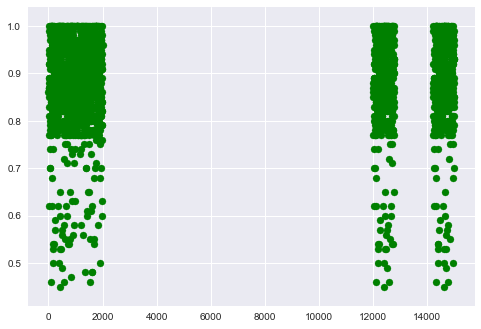

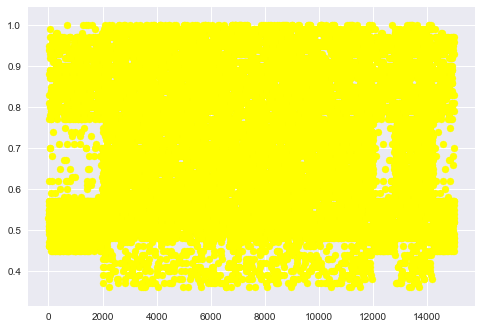

Times spent scatter plot


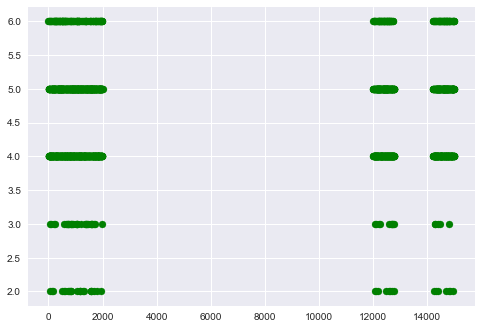

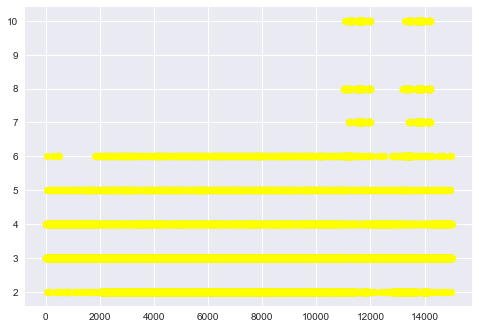

Number of projects


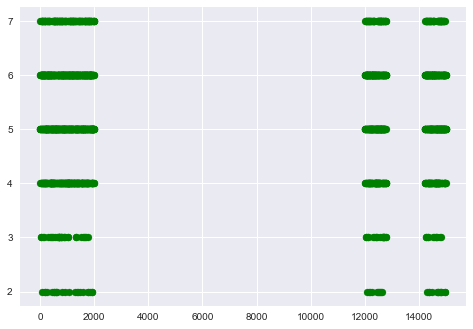

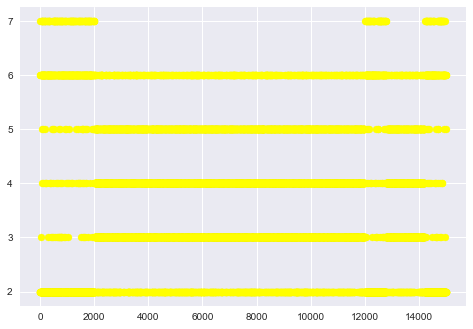

VARTRAIN
satisfaction_level          0.121078
last_evaluation             0.010353
number_project              1.248455
average_montly_hours     1212.379729
time_spend_company          0.597845
Work_accident               0.046635
left                        0.000000
promotion_last_5years       0.000620
dtype: float64
 PDFs graphs for training set of good employees who have left


E:\SOFTWARE\anaconda\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


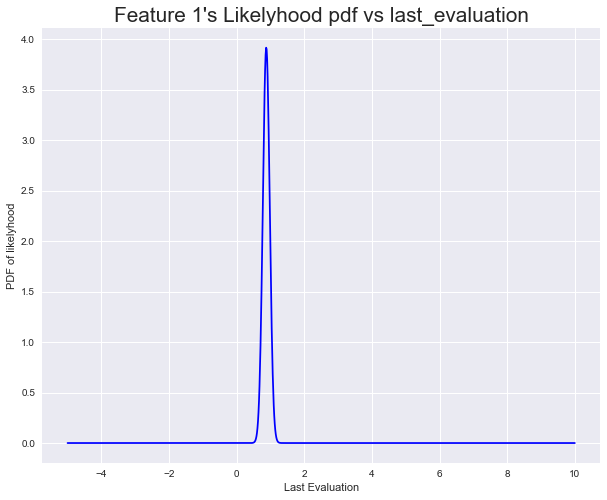

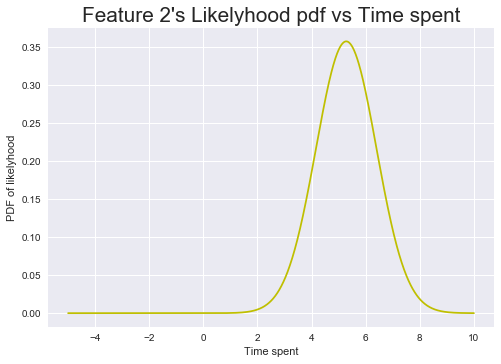

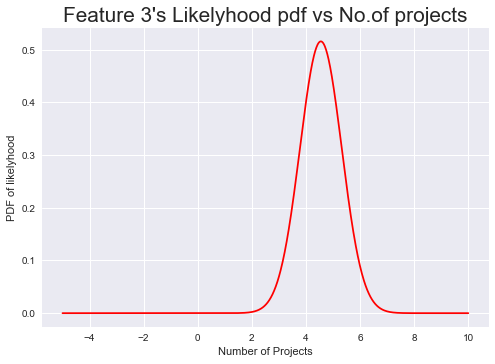

 PDFs graphs for the remaining class - ie excluding good emp who left


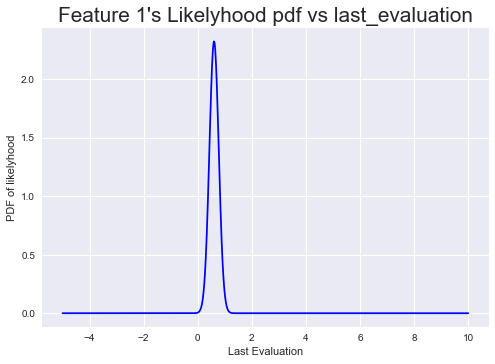

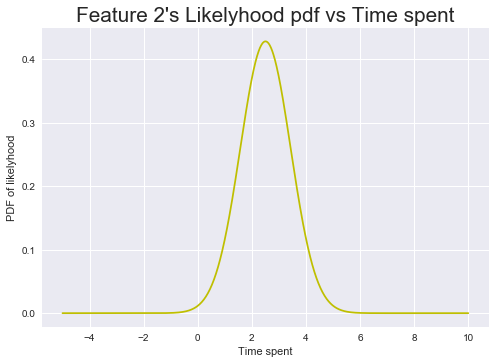

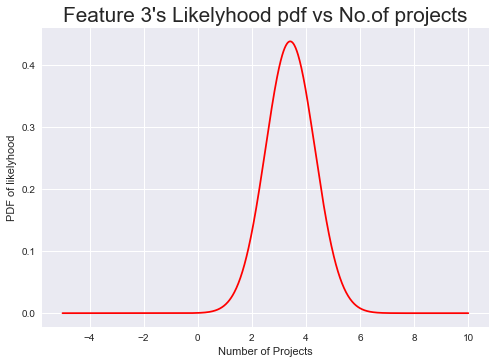

In [10]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split # We need to demarcate the Training and Testing set
import matplotlib.mlab as mlab
import math # for sqrt
import scipy.stats # normal distribution
from sklearn.preprocessing import normalize
import seaborn as sn # Data visualization
import pandas as pd
# return f(x_i | C_k) 
# i.e. the probability density of getting "x" in feature i's prob distribution given class k
df = pd.read_csv('C:/Users/Harshini S/Desktop/HR_comma_sep.csv',sep=',')
pf=df[((df.left==1)&(df.last_evaluation>=0.7141))|((df.time_spend_company>=4)&(df.left==1))|((df.number_project>=5)&(df.left==1))]
cf=df[(df.left==0)|((df.left==1)&(df.last_evaluation<0.7141))|((df.time_spend_company<4)&(df.left==1))|((df.number_project>5)&(df.left==1))]

plt.scatter(pf.index,pf.last_evaluation,color='green')
plt.show()
plt.scatter(cf.index,cf.last_evaluation,color='yellow')
plt.show()

print("Times spent scatter plot")
plt.scatter(pf.index,pf.time_spend_company,color='green')
plt.show()
plt.scatter(cf.index,cf.time_spend_company,color='yellow')
plt.show()

print("Number of projects")
plt.scatter(pf.index,pf.number_project,color='green')
plt.show()
plt.scatter(cf.index,cf.number_project,color='yellow')
plt.show()


df = df.sample(frac=1).reset_index(drop=True)
dfClasses = {}
dfC={}
means = {}
variances = {}

ct=0
ct2=0
train, test = train_test_split(df[((df.left==1)&(df.last_evaluation>=0.7141))|((df.time_spend_company>=4)&(df.left==1))|((df.number_project>=5)&(df.left==1))], test_size = 0.2)

predictedProb = {}
def labelofClass(x):
    return {
        'Left': 1,
        
    }.get(x, -1)    # -1 is default if x not found

dfClasses["Left1"] =train
variances = dfClasses["Left1"].var()
means = dfClasses["Left1"].mean()         
print("VARTRAIN")
print(variances)

x = np.linspace(-5, 10, 1000)

fig = plt.figure()
fig.set_size_inches(10, 8)
# Training dataset- LEFT1
print(" PDFs graphs for training set of good employees who have left")
plt.title('Feature 1\'s Likelyhood pdf vs last_evaluation', size='xx-large')
plt.xlabel('Last Evaluation')
plt.ylabel('PDF of likelyhood')


plt.plot(x,mlab.normpdf(x, means[1], math.sqrt(variances[1]) ), c = 'b', label = '')


plt.legend(loc=1) # 2 => leftTop ; 1 => rightTop

plt.show() 
#2
plt.title('Feature 2\'s Likelyhood pdf vs Time spent', size='xx-large')
plt.xlabel('Time spent')
plt.ylabel('PDF of likelyhood')


plt.plot(x,mlab.normpdf(x, means[2], math.sqrt(variances[2]) ), c = 'y', label = '')


plt.legend(loc=1) # 2 => leftTop ; 1 => rightTop

plt.show() 
#4

plt.title('Feature 3\'s Likelyhood pdf vs No.of projects', size='xx-large')
plt.xlabel('Number of Projects')
plt.ylabel('PDF of likelyhood')


plt.plot(x,mlab.normpdf(x, means[4], math.sqrt(variances[4]) ), c = 'r', label = '')


plt.legend(loc=1) # 2 => leftTop ; 1 => rightTop

plt.show() 



dfClasses["Left0"] = df.loc[(df.left==0)&((df.left==1)&(df.last_evaluation<0.7141))|((df.time_spend_company<4)&(df.left==1))|((df.number_project<5)&(df.left==1))]
va=dfClasses["Left0"].var()
me=dfClasses["Left0"].mean()

print(" PDFs graphs for the remaining class - ie excluding good emp who left")
                             
#1  
plt.title('Feature 1\'s Likelyhood pdf vs last_evaluation', size='xx-large')
plt.xlabel('Last Evaluation')
plt.ylabel('PDF of likelyhood')


plt.plot(x,mlab.normpdf(x, me[1], math.sqrt(va[1]) ), c = 'b', label = '')


plt.legend(loc=1) # 2 => leftTop ; 1 => rightTop

plt.show() 
#2
plt.title('Feature 2\'s Likelyhood pdf vs Time spent', size='xx-large')
plt.xlabel('Time spent')
plt.ylabel('PDF of likelyhood')


plt.plot(x,mlab.normpdf(x, me[2], math.sqrt(va[2]) ), c = 'y', label = '')


plt.legend(loc=1) # 2 => leftTop ; 1 => rightTop

plt.show() 
#4

plt.title('Feature 3\'s Likelyhood pdf vs No.of projects', size='xx-large')
plt.xlabel('Number of Projects')
plt.ylabel('PDF of likelyhood')


plt.plot(x,mlab.normpdf(x, me[4], math.sqrt(va[4]) ), c = 'r', label = '')


plt.legend(loc=1) # 2 => leftTop ; 1 => rightTop

plt.show() 